In [1]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
#url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
dead = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
recovered = pd.read_csv(url, error_bad_lines=False)

In [2]:
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,33,34,34,35,35,35,35,41
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,76,76,101,118,118,118,118,118,144,144
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,96,96,97,105,105,109,114
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,24,24,24,26,26,26,35,42,42,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
457,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
458,NaN,Montenegro,42.5000,19.3000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
confirmed.head(30)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,99,117,129,149,149,197,238,428,566,673
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,27,32,32,39,46,64,64,73,103,103
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,38,48,55,65,65,92,112,134,171,210
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,11,15,18,21,21,36,49,57,71,94
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,15,15,18,20,20,35,46,61,68,78
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,2,2,2,3,3,5,7,7,7,33


In [4]:
import seaborn as sns
%matplotlib inline

In [5]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,99,117,129,149,149,197,238,428,566,673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
456,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,...,0,0,0,1,1,5,6,7,9,9
457,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
458,NaN,Montenegro,42.5000,19.3000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [16]:
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
dead['region']=dead['Country/Region'].map(str)+'_'+dead['Province/State'].map(str)
recovered['region']=recovered['Country/Region'].map(str)+'_'+recovered['Province/State'].map(str)

In [17]:
confirmed["2/29/20"].sum()

86011

In [18]:
confirmed.tail(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,region
443,NaN,Equatorial Guinea,1.5000,10.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Equatorial Guinea_nan
444,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,France_Mayotte
445,NaN,Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6,Uzbekistan_nan
446,Netherlands,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,265,321,382,503,503,804,959,1135,1413,Netherlands_Netherlands
447,NaN,French Guiana,3.9339,-53.1258,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,French Guiana_nan
448,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,Canada_Nova Scotia
449,Guadeloupe,France,16.2500,-61.5833,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,France_Guadeloupe
450,NaN,Guam,13.4443,144.7937,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,Guam_nan
451,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,Puerto Rico_nan
452,NaN,Benin,9.3077,2.3158,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Benin_nan


In [19]:
dead

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,region
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Thailand_nan
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,10,10,15,16,19,22,22,27,Japan_nan
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Singapore_nan
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Nepal_nan
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaysia_nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,NaN,Somalia,5.1521,46.1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Somalia_nan
459,NaN,Tanzania,-6.3690,34.8888,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tanzania_nan
460,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The Bahamas_nan
461,Virgin Islands,US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,US_Virgin Islands


In [20]:
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,region
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,33,34,34,35,35,35,35,Thailand_nan
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,76,76,101,118,118,118,118,118,144,Japan_nan
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,96,96,97,105,105,109,Singapore_nan
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Nepal_nan
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,24,24,24,26,26,26,35,42,42,Malaysia_nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,NaN,Somalia,5.1521,46.1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Somalia_nan
459,NaN,Tanzania,-6.3690,34.8888,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tanzania_nan
460,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The Bahamas_nan
461,Virgin Islands,US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,US_Virgin Islands


In [21]:
def to_regional_time_series_dataframe(dataframe):
    df = dataframe
    df = df.drop(['Province/State', 'Country/Region','Lat', 'Long'], axis=1)
    df.set_index('region')
    df = df.T
    df.columns=df.loc['region']
    df=df.drop('region')
    df=df.fillna(0)
    return (df)



In [22]:
reshaped_dead = to_regional_time_series_dataframe(dead)
reshaped_confirmed = to_regional_time_series_dataframe(confirmed)
reshaped_recovered = to_regional_time_series_dataframe(recovered)


In [23]:
reshaped_confirmed.columns.values

array(['Thailand_nan', 'Japan_nan', 'Singapore_nan', 'Nepal_nan',
       'Malaysia_nan', 'Canada_British Columbia',
       'Australia_New South Wales', 'Australia_Victoria',
       'Australia_Queensland', 'Cambodia_nan', 'Sri Lanka_nan',
       'Germany_nan', 'Finland_nan', 'United Arab Emirates_nan',
       'Philippines_nan', 'India_nan', 'Italy_nan', 'Sweden_nan',
       'Spain_nan', 'Australia_South Australia', 'Belgium_nan',
       'Egypt_nan', 'Australia_From Diamond Princess', 'Lebanon_nan',
       'Iraq_nan', 'Oman_nan', 'Afghanistan_nan', 'Bahrain_nan',
       'Kuwait_nan', 'Algeria_nan', 'Croatia_nan', 'Switzerland_nan',
       'Austria_nan', 'Israel_nan', 'Pakistan_nan', 'Brazil_nan',
       'Georgia_nan', 'Greece_nan', 'North Macedonia_nan', 'Norway_nan',
       'Romania_nan', 'Estonia_nan', 'San Marino_nan', 'Belarus_nan',
       'Iceland_nan', 'Lithuania_nan', 'Mexico_nan', 'New Zealand_nan',
       'Nigeria_nan', 'Australia_Western Australia', 'Ireland_nan',
       'Luxem

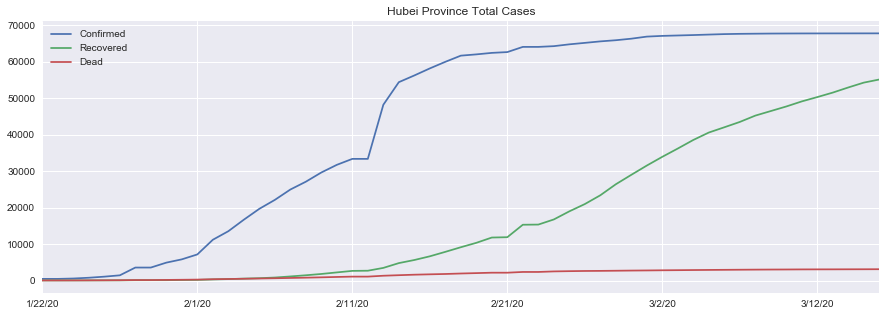

In [68]:
import matplotlib.style as style
import matplotlib.pyplot as plt
style.use('seaborn')
reshaped_confirmed["China_Hubei"].plot(figsize=(15,5), legend=True)
reshaped_recovered["China_Hubei"].plot(figsize=(15,5), title="Hubei Province Total Cases", legend=True)
reshaped_dead["China_Hubei"].plot(figsize=(15,5), legend=True)
plt.legend(['Confirmed', 'Recovered', 'Dead'])


plt.savefig('hubei_cases.png', dpi=600)

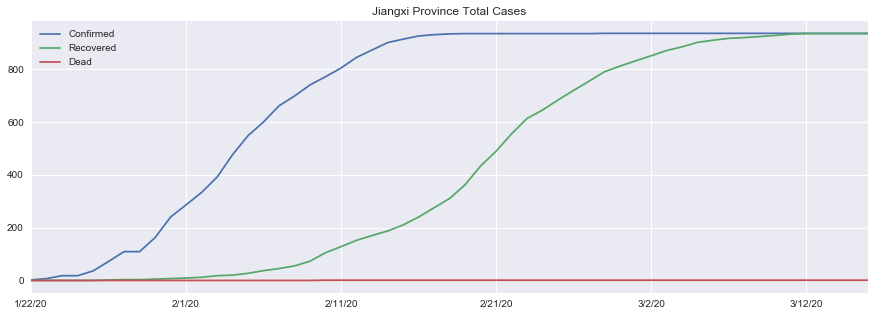

In [81]:
import matplotlib.style as style
import matplotlib.pyplot as plt
style.use('seaborn')
reshaped_confirmed["China_Jiangxi"].plot(figsize=(15,5), legend=True)
reshaped_recovered["China_Jiangxi"].plot(figsize=(15,5), title="Jiangxi Province Total Cases", legend=True)
reshaped_dead["China_Jiangxi"].plot(figsize=(15,5), legend=True)
plt.legend(['Confirmed', 'Recovered', 'Dead'])


plt.savefig('jiangxi_cases.png', dpi=600)

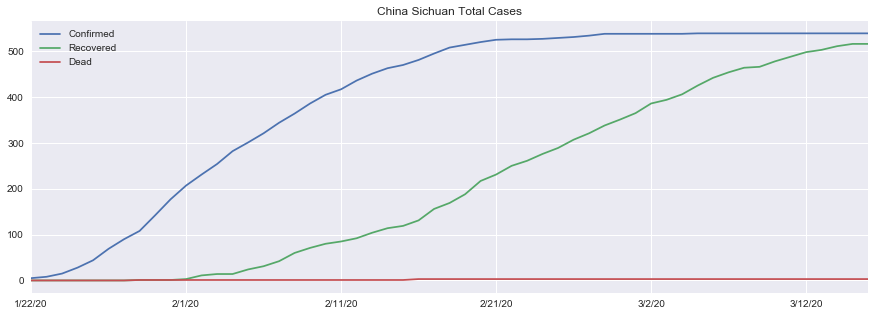

In [78]:
reshaped_confirmed["China_Sichuan"].plot(figsize=(15,5), title="China Sichuan Total Confirmed Cases")
reshaped_recovered["China_Sichuan"].plot(figsize=(15,5), title="China Sichuan Total Confirmed Cases")
reshaped_dead["China_Sichuan"].plot(figsize=(15,5), title="China Sichuan Total Cases")



plt.legend(['Confirmed', 'Recovered', 'Dead'])

plt.savefig('sichuan_cases.png', dpi=600)

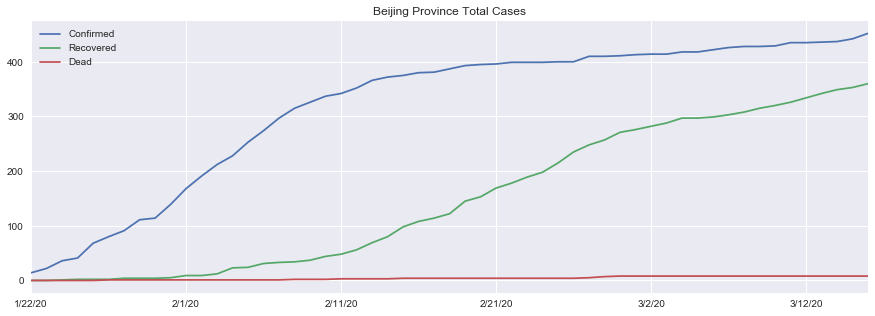

In [82]:
import matplotlib.style as style
import matplotlib.pyplot as plt
style.use('seaborn')
reshaped_confirmed["China_Beijing"].plot(figsize=(15,5), legend=True)
reshaped_recovered["China_Beijing"].plot(figsize=(15,5), title="Beijing Province Total Cases", legend=True)
reshaped_dead["China_Beijing"].plot(figsize=(15,5), legend=True)
plt.legend(['Confirmed', 'Recovered', 'Dead'])


plt.savefig('beijing_cases.png', dpi=600)

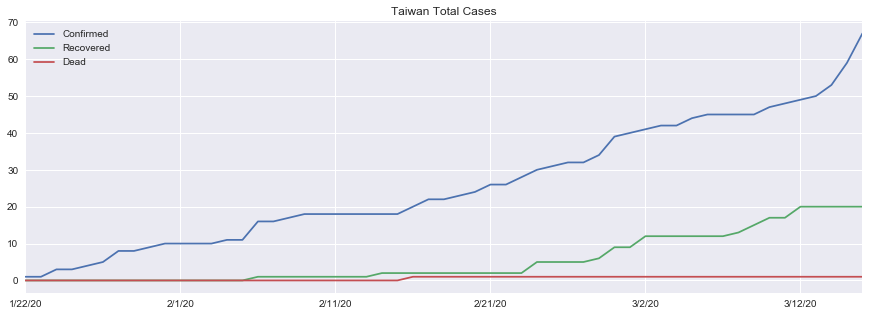

In [79]:
reshaped_confirmed["Taiwan*_nan"].plot(figsize=(15,5), title="Taiwan Total Confirmed Cases")
reshaped_recovered["Taiwan*_nan"].plot(figsize=(15,5), title="Taiwan Total Confirmed Cases")
reshaped_dead["Taiwan*_nan"].plot(figsize=(15,5), title="Taiwan Total Cases")


plt.legend(['Confirmed', 'Recovered', 'Dead'])

plt.savefig('taiwan_cases.png', dpi=600)

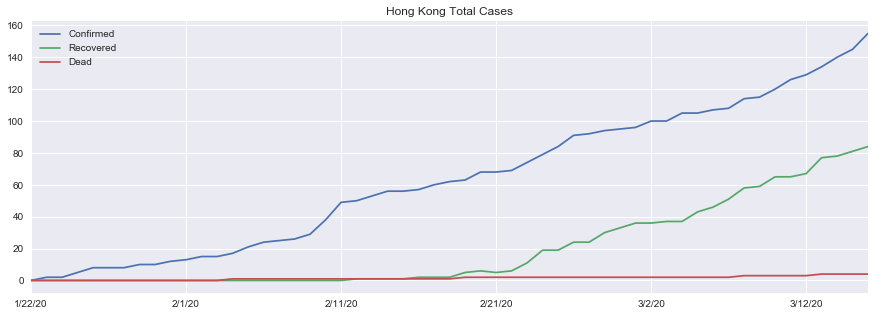

In [80]:
reshaped_confirmed["China_Hong Kong"].plot(figsize=(15,5))
reshaped_recovered["China_Hong Kong"].plot(figsize=(15,5))
reshaped_dead["China_Hong Kong"].plot(figsize=(15,5), title="Hong Kong Total Cases")



plt.legend(['Confirmed', 'Recovered', 'Dead'])

plt.savefig('hong_kong_cases.png', dpi=600)

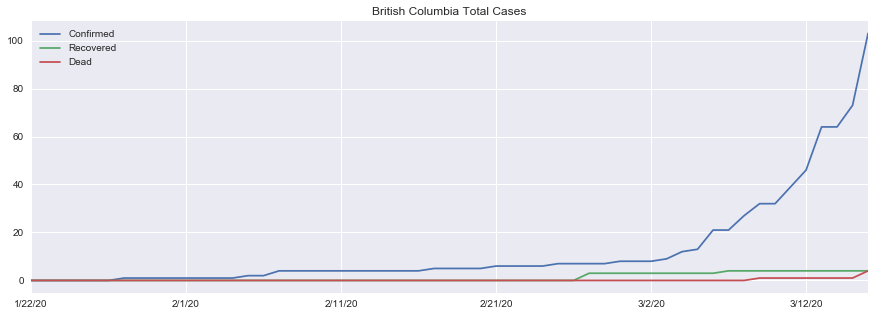

In [69]:
reshaped_confirmed["Canada_British Columbia"].plot(figsize=(15,5))
reshaped_recovered["Canada_British Columbia"].plot(figsize=(15,5))
reshaped_dead["Canada_British Columbia"].plot(figsize=(15,5), title="British Columbia Total Cases")

plt.legend(['Confirmed', 'Recovered', 'Dead'])

plt.savefig('british_colombia_cases.png', dpi=600)

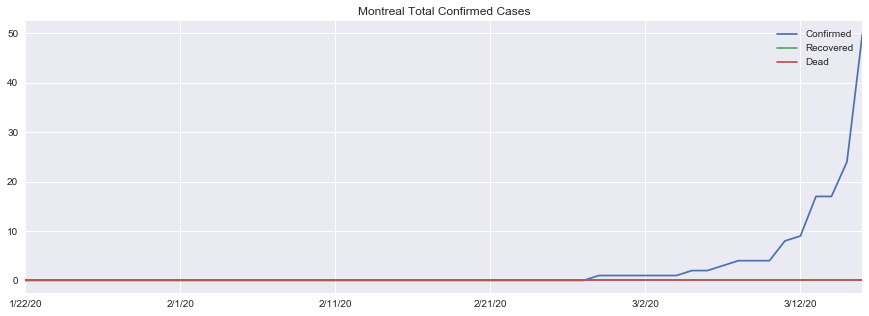

In [73]:
reshaped_confirmed["Canada_Quebec"].plot(figsize=(15,5), title="Montreal Total Confirmed Cases")
reshaped_recovered["Canada_Quebec"].plot(figsize=(15,5), title="Montreal Total Confirmed Cases")
reshaped_dead["Canada_Quebec"].plot(figsize=(15,5), title="Montreal Total Confirmed Cases")


plt.legend(['Confirmed', 'Recovered', 'Dead'])

plt.savefig('montreal_cases.png', dpi=600)

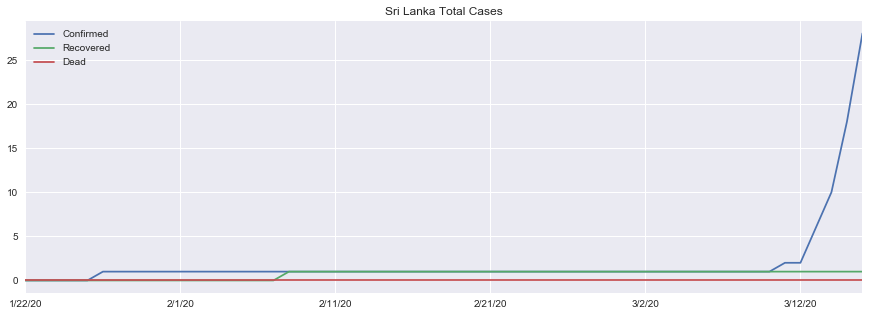

In [75]:
reshaped_confirmed["Sri Lanka_nan"].plot(figsize=(15,5), title="Sri Lanka Total Confirmed Cases")
reshaped_recovered["Sri Lanka_nan"].plot(figsize=(15,5), title="Sri Lanka Total Confirmed Cases")
reshaped_dead["Sri Lanka_nan"].plot(figsize=(15,5), title="Sri Lanka Total Cases")


plt.legend(['Confirmed', 'Recovered', 'Dead'])

plt.savefig('sri_lanka_cases.png', dpi=600)

In [360]:
def shift_data(dataset, days):
    X = []
    y = []
    dataset = dataset.values
    for i in range(len(dataset)-7-days):
        X.append(dataset[i:i+7])
        
    for i in range(len(dataset)-7-days):
        y.append(dataset[i+6+days])
    
    X,y = np.array(X), np.array(y)
    return X, y
    

In [361]:
reshaped_confirmed.columns.values

array(['Mainland China_Anhui', 'Mainland China_Beijing',
       'Mainland China_Chongqing', 'Mainland China_Fujian',
       'Mainland China_Gansu', 'Mainland China_Guangdong',
       'Mainland China_Guangxi', 'Mainland China_Guizhou',
       'Mainland China_Hainan', 'Mainland China_Hebei',
       'Mainland China_Heilongjiang', 'Mainland China_Henan',
       'Mainland China_Hubei', 'Mainland China_Hunan',
       'Mainland China_Inner Mongolia', 'Mainland China_Jiangsu',
       'Mainland China_Jiangxi', 'Mainland China_Jilin',
       'Mainland China_Liaoning', 'Mainland China_Ningxia',
       'Mainland China_Qinghai', 'Mainland China_Shaanxi',
       'Mainland China_Shandong', 'Mainland China_Shanghai',
       'Mainland China_Shanxi', 'Mainland China_Sichuan',
       'Mainland China_Tianjin', 'Mainland China_Tibet',
       'Mainland China_Xinjiang', 'Mainland China_Yunnan',
       'Mainland China_Zhejiang', 'Thailand_nan', 'Japan_nan',
       'South Korea_nan', 'Taiwan_Taiwan', 'US_Seatt

In [362]:
#Getting the index values of the China regions
np.where(reshaped_confirmed.columns.values == 'China_Anhui')

(array([0]),)

In [378]:
confirmed.tail(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/20,2/29/20,region,3/01/20,3/02/20,3/03/20,3/04/20,3/05/20,3/06/20,3/07/20
99,NaN,Norway,60.4720,8.4689,0,0,0,0,0,0,...,6,15,Norway_nan,33.0,57.0,84.0,114.0,141.0,170.0,202.0
100,NaN,Romania,45.9432,24.9668,0,0,0,0,0,0,...,3,3,Romania_nan,19.0,42.0,70.0,101.0,125.0,154.0,187.0
101,NaN,Denmark,56.2639,9.5018,0,0,0,0,0,0,...,1,3,Denmark_nan,20.0,42.0,71.0,101.0,125.0,155.0,188.0
102,NaN,Estonia,58.5953,25.0136,0,0,0,0,0,0,...,1,1,Estonia_nan,17.0,40.0,68.0,98.0,123.0,152.0,185.0
103,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,1,6,Netherlands_nan,24.0,46.0,75.0,104.0,130.0,159.0,191.0
104,NaN,San Marino,43.9424,12.4578,0,0,0,0,0,0,...,1,1,San Marino_nan,17.0,40.0,68.0,98.0,123.0,152.0,185.0
105,NaN,Belarus,53.7098,27.9534,0,0,0,0,0,0,...,1,1,Belarus_nan,17.0,40.0,68.0,98.0,123.0,152.0,186.0
106,"Montreal, QC",Canada,45.5017,-73.5673,0,0,0,0,0,0,...,1,1,"Canada_ Montreal, QC",17.0,40.0,68.0,98.0,123.0,152.0,186.0
107,NaN,Iceland,64.9631,-19.0208,0,0,0,0,0,0,...,1,1,Iceland_nan,17.0,40.0,68.0,98.0,123.0,152.0,186.0
108,NaN,Lithuania,55.1694,23.8813,0,0,0,0,0,0,...,1,1,Lithuania_nan,17.0,40.0,68.0,98.0,123.0,152.0,186.0


In [363]:
np.where(reshaped_confirmed.columns.values == 'Mainland China_Zhejiang')

(array([30]),)

In [364]:
for i in range(1, 8):
    X_train, y_train = shift_data(reshaped_confirmed['Mainland China_Beijing'], i)
    regressor = LinearRegression().fit(X_train, y_train)
    
    predictions = []
    for j in range(len(confirmed)):
        X_test = reshaped_confirmed.iloc[-7:, j].values.reshape(1, -1)

        predictions.append(regressor.predict(X_test))
        
    confirmed[('3/0'+ str(i) + '/20')] = np.array(predictions).ravel().round()
        
        

In [278]:
regressor.score(X_train, y_train)

0.9980453722701464

In [279]:
import pickle
filename = '../models/china_regressor.pkl'
pickle.dump(regressor, open(filename, 'wb'))
 

In [280]:
#To upload to the cloud:
# gsutil cp ./china_regressor.pkl gs://corona-marihacks2020/china_regressor.pkl

In [281]:
loaded_regressor = pickle.load(open(filename, 'rb'))
# result = loaded_regressor.score(X_test, y_test)
# print(result)

In [282]:
reshaped_confirmed.iloc[-7:, 2].values.reshape(1, -1)

array([[575, 576, 576, 576, 576, 576, 576]])

In [283]:
confirmed.shape

(119, 44)

In [284]:
X_test = reshaped_confirmed.iloc[-7:, 0].values.reshape(1, -1)
regressor.predict(X_test)

array([[965.84977204]])

In [287]:
predictions = []
for i in range(len(confirmed)):
    X_test = reshaped_confirmed.iloc[-7:, i].values.reshape(1, -1)

    predictions.append(regressor.predict(X_test))

In [288]:
len(predictions)

119

In [289]:
confirmed['3/01/20'] = np.array(predictions).ravel().round()

In [290]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,region,3/01/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,989,989,989,989,989,990,990,Mainland China_Anhui,966.0
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,399,399,399,400,400,410,410,411,Mainland China_Beijing,412.0
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,573,575,576,576,576,576,576,576,Mainland China_Chongqing,569.0
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,293,293,294,294,296,296,296,Mainland China_Fujian,301.0
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,Mainland China_Gansu,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,NaN,Luxembourg,49.8153,6.1296,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Luxembourg_nan,17.0
115,NaN,Monaco,43.7333,7.4167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Monaco_nan,17.0
116,NaN,Qatar,25.3548,51.1839,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Qatar_nan,17.0
117,"Portland, OR",US,45.5051,-122.6750,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,"US_Portland, OR",17.0


In [291]:
pd.to_datetime(reshaped_confirmed["Mainland China_Shanghai"].index.values)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29'],
              dtype='datetime64[ns]', freq=None)

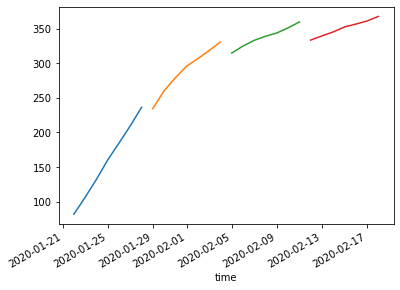

In [501]:
import matplotlib.pyplot as plt
import xarray as xr

for i in range(0, len(y_pred_test), 7):
    y_pred_test_xr = xr.DataArray(y_pred_test[i], dims=('time'), coords={'time': pd.to_datetime(reshaped_confirmed["Mainland China_Shanghai"].index.values[i:i+7])})
    y_pred_test_xr.plot()




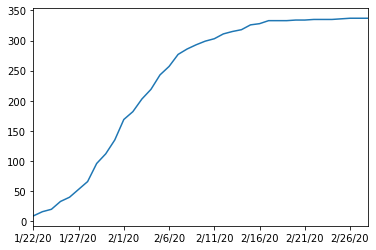

In [502]:
reshaped_confirmed["Mainland China_Shanghai"].plot()


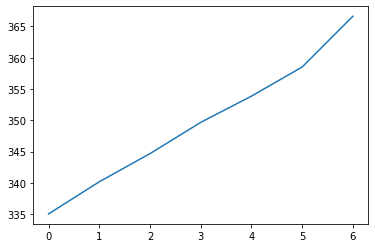

In [505]:
plt.plot(y_pred_test[-1])

In [139]:
confirmed.columns.values

array(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20',
       '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20',
       '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', 'region'], dtype=object)

In [98]:
import json

In [119]:
def df_to_geojson(df, properties, lat='latitude', lon='longitude'):
    """
    Turn a dataframe containing point data into a geojson formatted python dictionary
    
    df : the dataframe to convert to geojson
    properties : a list of columns in the dataframe to turn into geojson feature properties
    lat : the name of the column in the dataframe that contains latitude data
    lon : the name of the column in the dataframe that contains longitude data
    """
    
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}

    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in df.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}

        # fill in the coordinates
        feature['geometry']['coordinates'] = [row[lon],row[lat]]

        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    
    return geojson

In [136]:
confirmed.columns.values[0:2]

array(['Province/State', 'Country/Region'], dtype=object)

In [137]:
# Code has already been ran
# for i in range(4, len(confirmed.columns.values)-1):
#     confirmed_dropped = confirmed.drop(confirmed.columns.values[0:2], axis=1).drop(confirmed.columns.values[4:i], axis=1).drop(confirmed.columns.values[i+1:], axis=1);
    
#     geojson_dict = df_to_geojson(confirmed_dropped, properties=[confirmed.columns.values[i], "Lat", "Long"], lat='Lat', lon="Long");
#     geojson_str = json.dumps(geojson_dict, indent=2);
    
    
#     time = ('0' + confirmed.columns.values[i] + '20');
#     time = time.replace('/', '-');

#     # save the geojson result to a file
#     output_filename = '../data/'+ time + '.geojsonp'
#     with open(output_filename, 'w') as output_file:
#         output_file.write('eqfeed_callback({})'.format(geojson_str))
    
    

In [380]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/20,2/29/20,region,3/01/20,3/02/20,3/03/20,3/04/20,3/05/20,3/06/20,3/07/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,Mainland China_Anhui,966.0,932.0,891.0,848.0,815.0,774.0,726.0
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,410,411,Mainland China_Beijing,412.0,408.0,410.0,411.0,412.0,412.0,409.0
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,Mainland China_Chongqing,569.0,559.0,546.0,534.0,524.0,513.0,499.0
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,Mainland China_Fujian,301.0,306.0,314.0,322.0,330.0,338.0,346.0
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,Mainland China_Gansu,103.0,121.0,143.0,166.0,185.0,208.0,234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,NaN,Luxembourg,49.8153,6.1296,0,0,0,0,0,0,...,0,1,Luxembourg_nan,17.0,40.0,69.0,99.0,123.0,152.0,186.0
115,NaN,Monaco,43.7333,7.4167,0,0,0,0,0,0,...,0,1,Monaco_nan,17.0,40.0,69.0,99.0,123.0,152.0,186.0
116,NaN,Qatar,25.3548,51.1839,0,0,0,0,0,0,...,0,1,Qatar_nan,17.0,40.0,69.0,99.0,123.0,152.0,186.0
117,"Portland, OR",US,45.5051,-122.6750,0,0,0,0,0,0,...,0,1,"US_Portland, OR",17.0,40.0,69.0,99.0,123.0,152.0,186.0


In [401]:
for i in range(1, 8):
    confirmed_dropped = confirmed.drop(confirmed.columns.values[:2], axis=1).drop(confirmed.columns.values[4:-i], axis=1)
    geojson_dict = df_to_geojson(confirmed_dropped, properties=[confirmed_dropped.columns.values[2], "Lat", "Long"], lat='Lat', lon= "Long")
    geojson_str = json.dumps(geojson_dict, indent=2)
    # save the geojson result to a file
    
    time = ('0' + confirmed_dropped.columns.values[2] + '20');
    time = time.replace('/', '-');

    # save the geojson result to a file
    output_filename = '../data/'+ time + '.geojsonp'
    
    with open(output_filename, 'w') as output_file:
        output_file.write('eqfeed_callback({})'.format(geojson_str))
      

In [146]:
# save the geojson result to a file
output_filename = '../data/dataset.geojsonp'
with open(output_filename, 'w') as output_file:
    output_file.write('eqfeed_callback({})'.format(geojson_str))
    
# how many features did we save to the geojson file?
print('{} geotagged features saved to file'.format(len(geojson_dict['features'])))

119 geotagged features saved to file
